# Heat wave Analysis

***
This notebook aims to illustrate the average increasing trends and related behaviors that heat waves have presented in the U.S.A. from 1960 to 2020. Some datasets were analyzed per year and some per decade.
***

#### 1) Importing Required Packages

In [1]:
## Required packages
import pandas as pd # To import and manipulate datasets
import geopandas as gpd # To created Geo datasets for maps and plot maps
import matplotlib # To adjust visualizations (World map)
import matplotlib.pyplot as plt # To make changes in figures 
import plotly.express as px # To plot maps and visualize variables impact in the map
import plotly.graph_objects as go # Another way To plot maps with color scale


#### 2) Importing Heatwaves datasets

In [2]:
characteristics = pd.read_csv(r'C:\Users\ricar\OneDrive\Escritorio\Masters_of_Statistics\Semester_6\Modern_Data_Analytics\Project\August_Exam\MAD_backup\2.preprocessed_data\Wheather_and_climate\Heatwaves\df_characteristics.csv')
anual = pd.read_csv(r'C:\Users\ricar\OneDrive\Escritorio\Masters_of_Statistics\Semester_6\Modern_Data_Analytics\Project\August_Exam\MAD_backup\2.preprocessed_data\Wheather_and_climate\Heatwaves\df_anual.csv')
changes = pd.read_csv(r'C:\Users\ricar\OneDrive\Escritorio\Masters_of_Statistics\Semester_6\Modern_Data_Analytics\Project\August_Exam\MAD_backup\2.preprocessed_data\Wheather_and_climate\Heatwaves\df_changes.csv')

#### 3) Descriptive Statistics

****
 <i> <b>Characteristics Dataset: </b></i> it relates to characteristics of the heat waves from the 1960s to the 2010s decades
****

In [3]:
characteristics.head(2)

Decade  Frequency  Duration  Season  Intensity
0    1960      2.044     2.986  22.006      1.991
1    1970      2.800     3.187  32.984      2.112

In [4]:
characteristics.iloc[:,1:5].describe()

Frequency  Duration     Season  Intensity
count   6.000000  6.000000   6.000000   6.000000
mean    3.706074  3.415167  42.845167   2.237000
std     1.410546  0.345981  16.143621   0.172644
min     2.044000  2.986000  22.006000   1.991000
25%     2.875000  3.210500  34.038500   2.130750
50%     3.438000  3.365500  41.088000   2.250000
75%     4.313000  3.581250  49.715500   2.347500
max     6.024444  3.962000  68.609000   2.460000

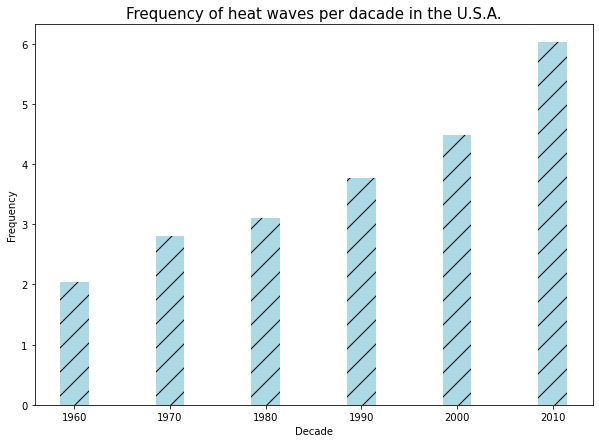

In [5]:
fig = plt.figure(figsize = (10, 7))

plt.bar(characteristics["Decade"], characteristics["Frequency"], color ='lightblue',
        width = 3, hatch = '/')
 
plt.xlabel("Decade")
plt.ylabel("Frequency")
plt.title("Frequency of heat waves per dacade in the U.S.A.", size = 15)
plt.show()

Frequency refers to the average number of heat waves per year among decades. For example, there were 2 heat waves per year on average, from 1960 to the beginning of 1970. 

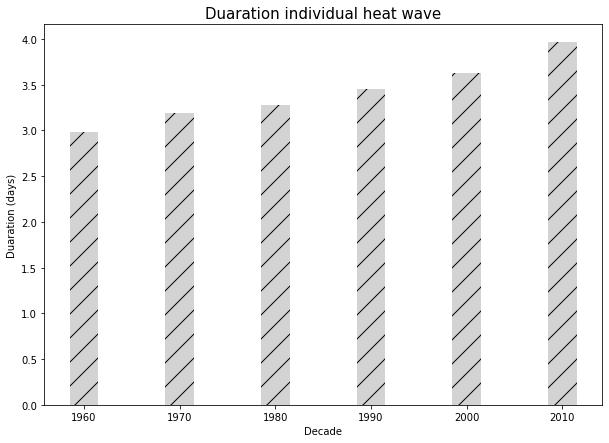

In [6]:
fig = plt.figure(figsize = (10, 7))
 
plt.bar(characteristics["Decade"], characteristics["Duration"], color ='lightgrey',
        width = 3, hatch = '/')
 
plt.xlabel("Decade")
plt.ylabel("Duaration (days)")
plt.title("Duaration individual heat wave", size = 15)
plt.show()

The duration shows the number of days an individual heat wave lasted in a decade on average. For example, one heat wave used to last nearly 3 days on average from 1960 to 1970.  

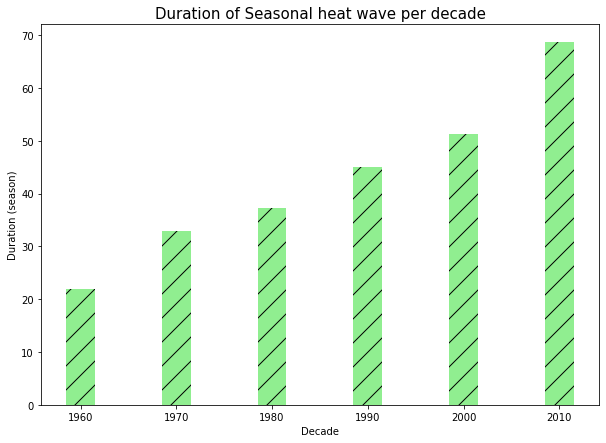

In [7]:
fig = plt.figure(figsize = (10, 7))
 
plt.bar(characteristics["Decade"], characteristics["Season"], color ='lightgreen',
        width = 3, hatch = '/')
 
plt.xlabel("Decade")
plt.ylabel("Duration (season)")
plt.title("Duration of Seasonal heat wave per decade", size = 15)
plt.show()

The Season variable shows the number of days the total number of heat waves in a year lasted in a decade on average. For instance, the total number of heat waves in a year used to last about 22 days on average, from 1960 to 1970

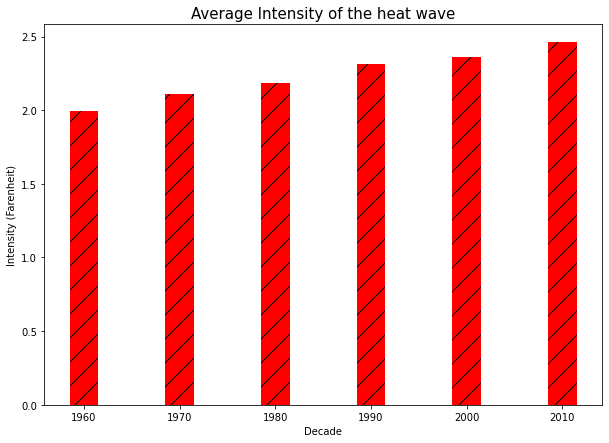

In [8]:
fig = plt.figure(figsize = (10, 7))
 
plt.bar(characteristics["Decade"], characteristics["Intensity"], color ='red',
        width = 3, hatch = '/')
 
plt.xlabel("Decade")
plt.ylabel("Intensity (Farenheit)")
plt.title("Average Intensity of the heat wave", size = 15)
plt.show()

The Intensity shows how hot the heat waves were, compared with the local temperature threshold for defining a heat wave in fahrenheit degrees. For instance, from 1960 to 1970 the intensity of the heat waves was around 2 °F above expected on average. 

****
 <i> <b>Heat wave Index Dataset: </b></i> It represents a combination of frequency and area. For instance that 20% of the country experienced 2 heat waves and 10% experienced 1 heat wave at a certain year.
****

In [9]:
anual.head(2)

Year  Heat wave index
0  1890              0.0
1  1891              0.0

In [10]:
round(anual.iloc[:,1:2].describe(),3)

Heat wave index
count          131.000
mean             0.100
std              0.155
min              0.000
25%              0.027
50%              0.058
75%              0.116
max              1.281

The index value for a given year depends on how often such severe heat waves occur and how widespread they are

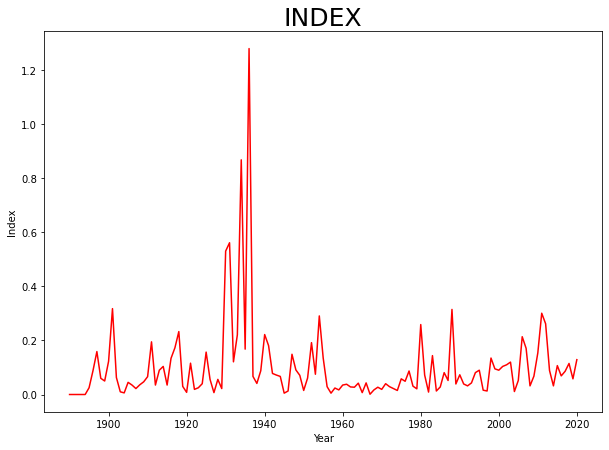

In [11]:
fig = plt.figure(figsize = (10, 7))

plt.plot(anual["Year"], anual ["Heat wave index"], color = "red")
plt.xlabel('Year')
plt.ylabel('Index')
plt.title("INDEX", size = 25)
plt.show()

Between the 20s and the 40s, the country experienced the impact of heatwave frequency in more places or in a greater magnitude.

****
 <i> <b>Changes Dataset: </b></i> The changes that the heat waves presented per year in terms of frequency, individual duration, seasonal length, and intensity in 50 cities from 30 states.  
****

In [12]:
# Num of States
num_states=changes["State"].unique()
num_states.shape

(30,)

In [13]:
# Data Variables 
changes.head(1)

State   Location  Latitude  Longitude  Frequency Change  Duration Change  \
0    NY  ALBANY_NY     42.75      -73.8          3.488136         0.720787   

   Season Change  Intensity Change  
0      37.732203          0.595193

In [14]:
# Overall analysis
changes.describe()

Latitude   Longitude  Frequency Change  Duration Change  \
count  50.000000   50.000000         50.000000        50.000000   
mean   36.786200  -90.831600          4.368814         1.158514   
std     5.424297   15.865709          2.361511         1.012090   
min    18.430000 -122.600000          0.986441        -0.982020   
25%    33.590000  -98.277500          2.814407         0.568624   
50%    36.835000  -86.005000          4.101695         1.130693   
75%    40.740000  -79.140000          5.268644         1.675819   
max    47.450000  -66.000000         13.671186         3.849048   

       Season Change  Intensity Change  
count      50.000000         50.000000  
mean       50.275864          0.545938  
std        24.496374          0.411279  
min         8.369492         -0.354173  
25%        36.253390          0.336634  
50%        47.988136          0.488029  
75%        59.580508          0.770309  
max       132.647458          1.558959

In [15]:
# In case we want to study a specific State
df_grouped = changes.groupby('State')
NY = df_grouped.get_group('NY')

print(NY)
NY.describe()

   State      Location  Latitude  Longitude  Frequency Change  \
0     NY     ALBANY_NY     42.75     -73.80          3.488136   
8     NY    BUFFALO_NY     42.93     -78.73          1.932203   
39    NY  ROCHESTER_NY     43.12     -77.67          1.138983   

    Duration Change  Season Change  Intensity Change  
0          0.720787      37.732203          0.595193  
8          0.331351      17.030508          0.357901  
39        -0.457079       8.369492         -0.159162  


Latitude  Longitude  Frequency Change  Duration Change  Season Change  \
count   3.000000   3.000000          3.000000         3.000000       3.000000   
mean   42.933333 -76.733333          2.186441         0.198353      21.044068   
std     0.185023   2.595040          1.195034         0.600090      15.087203   
min    42.750000 -78.730000          1.138983        -0.457079       8.369492   
25%    42.840000 -78.200000          1.535593        -0.062864      12.700000   
50%    42.930000 -77.670000          1.932203         0.331351      17.030508   
75%    43.025000 -75.735000          2.710169         0.526069      27.381356   
max    43.120000 -73.800000          3.488136         0.720787      37.732203   

       Intensity Change  
count          3.000000  
mean           0.264644  
std            0.385727  
min           -0.159162  
25%            0.099369  
50%            0.357901  
75%            0.476547  
max            0.595193

***
 <i> <b> Visual representation of the heat waves changes in some states.</b></i> 
***

##### Creating Geo datasets to plot maps

In [16]:
# Loading Geopandas dataset to plot world map
map_data =gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
map_data.head(2)

pop_est continent      name iso_a3  gdp_md_est  \
0    889953.0   Oceania      Fiji    FJI        5496   
1  58005463.0    Africa  Tanzania    TZA       63177   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...

In [17]:
# Comverting Changes dataset latitude and Longitude in Coordinates 
geo_changes = gpd.GeoDataFrame(changes, geometry = gpd.points_from_xy(changes.Longitude, changes.Latitude))
geo_changes.head(2)

State        Location  Latitude  Longitude  Frequency Change  \
0    NY       ALBANY_NY     42.75     -73.80          3.488136   
1    NM  ALBUQUERQUE_NM     35.05    -106.62          3.962712   

   Duration Change  Season Change  Intensity Change  \
0         0.720787      37.732203          0.595193   
1         1.022070      38.335593          0.298746   

                      geometry  
0   POINT (-73.80000 42.75000)  
1  POINT (-106.62000 35.05000)

Please note that measurements were done in 50 cities then we aim to find the average results per state and for that end, we group by our changes dataset before using it to plot the results.

In [18]:
# Grouping and averaging data by State
changes_group = changes.groupby('State').mean()
changes_group["State"]=changes_group.index
changes_group.head(2)

Latitude  Longitude  Frequency Change  Duration Change  Season Change  \
State                                                                          
AL       33.570    -86.750          5.400000         2.549656      66.803390   
AZ       32.775   -111.475          5.249153         1.413170      51.081356   

       Intensity Change State  
State                          
AL             0.593780    AL  
AZ             0.684543    AZ

##### States in North America where the changes were observed

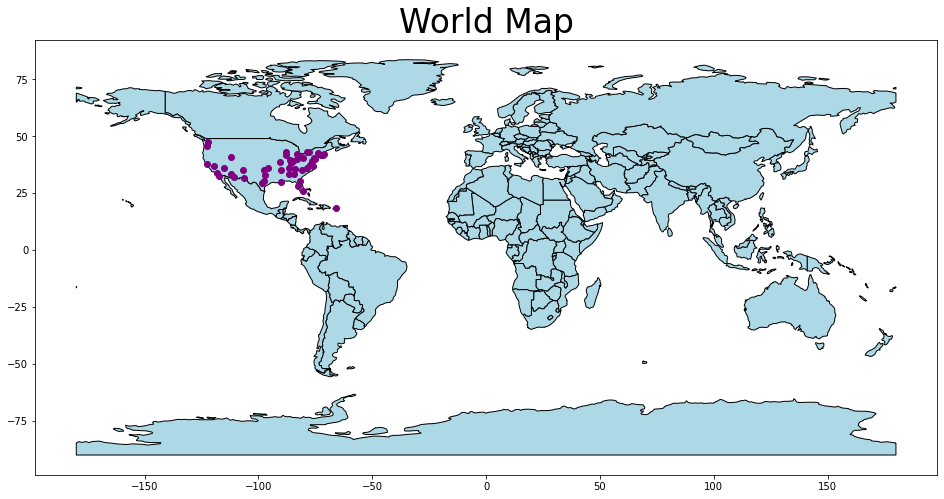

In [19]:
#Cities where temperature was measured
axis = map_data.plot(
color = "lightblue", edgecolor = "black")


geo_changes.plot(ax = axis, color = "purple")
plt.title("World Map",size = 33)

fig = matplotlib.pyplot .gcf()
fig.set_size_inches (30,8)
fig.savefig("matplot.png", dpi=200)
plt.show()

##### Note:
GitHub performs a static render of the notebooks and it doesn't include the embedded HTML/JavaScript that makes up a plotly graph, and thereby, the maps below cannot be shown in the repository. However, click the link below to access Jupyter nbviewer to have access to the maps figures.

https://nbviewer.org/github/Ricardo033/MAD_project/blob/main/3.Analysis/3.Heatwaves_Impact.ipynb

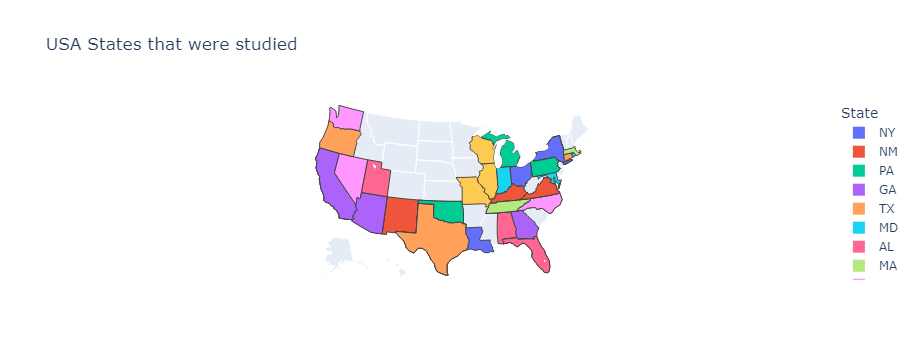

In [20]:
# Clickin the square on the right sight of the map will show the state on the map
f = px.choropleth(changes,
                 locationmode = "USA-states",
                 locations = changes['State'],
                 scope ="usa",
                 color = changes["State"],
                 title="USA States that were studied")

f.show()

##### Note:

Locating the mouse cursor on a certain state will show the name of the state and its respective value.

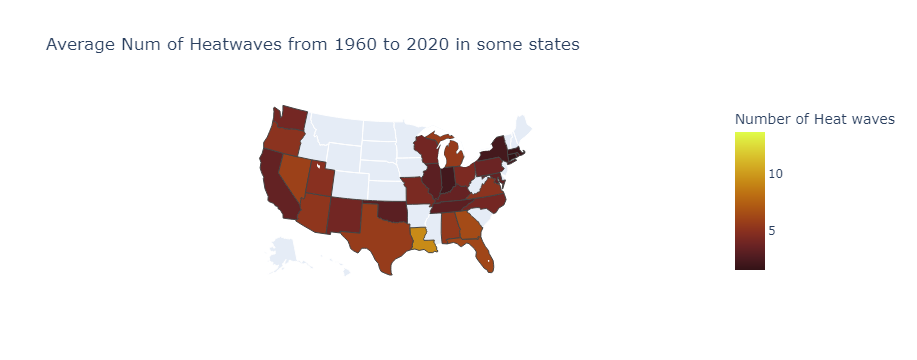

In [21]:
# Frequency refers to number of heatwaves 
fig = go.Figure(data=go.Choropleth( 
                 locations =changes_group["State"],
                 z = round(changes_group ['Frequency Change'].astype(float),2), 
                 locationmode = 'USA-states',
                 colorscale = 'solar',
                 colorbar_title = "Number of Heat waves",             
))

fig.update_layout(
    title_text = 'Average Num of Heatwaves from 1960 to 2020 in some states' ,
    geo_scope='usa', # limite map scope to USA
)

fig.show()

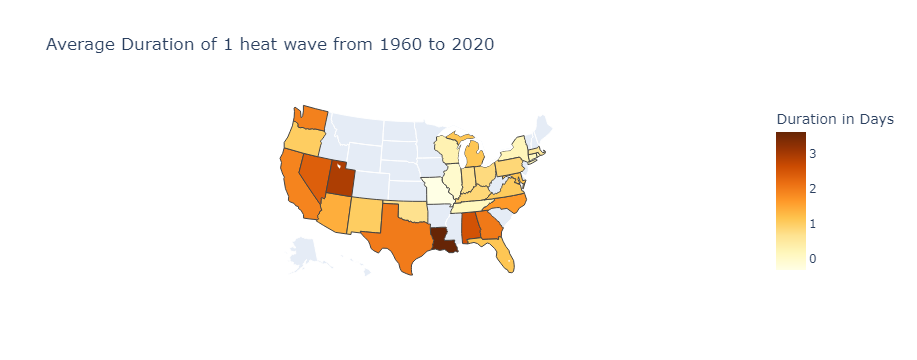

In [22]:
# Frequency refers to number of heatwaves 
fig = go.Figure(data=go.Choropleth( 
                 locations = changes_group["State"],
                 z = round(changes_group['Duration Change'].astype(float),2), 
                 locationmode = 'USA-states',
                 colorscale = 'ylorbr',
                 colorbar_title = "Duration in Days",             
))

fig.update_layout(
    title_text = 'Average Duration of 1 heat wave from 1960 to 2020 ' ,
    geo_scope='usa', # limite map scope to USA
)

fig.show()

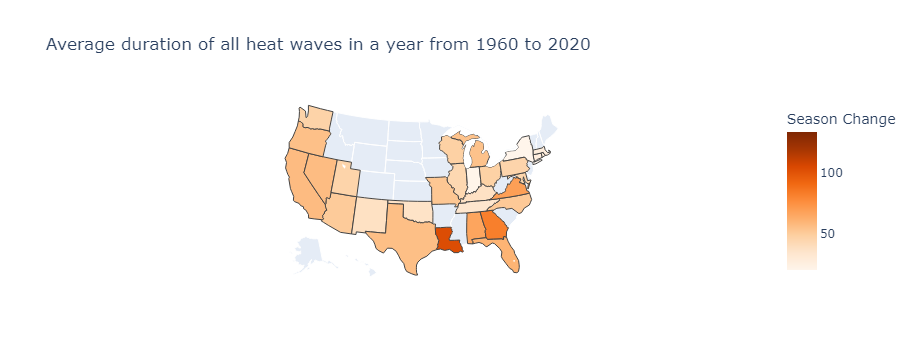

In [23]:
# Duration of the wavelengths in days per season

fig = go.Figure(data=go.Choropleth( 
                 locations = changes_group["State"],
                 z = round(changes_group['Season Change'].astype(float),2), 
                 locationmode = 'USA-states',
                 colorscale = 'oranges',
                 colorbar_title = "Season Change",          
))

fig.update_layout(
    title_text = 'Average duration of all heat waves in a year from 1960 to 2020' ,
    geo_scope='usa', # limite map scope to USA
)

fig.show()

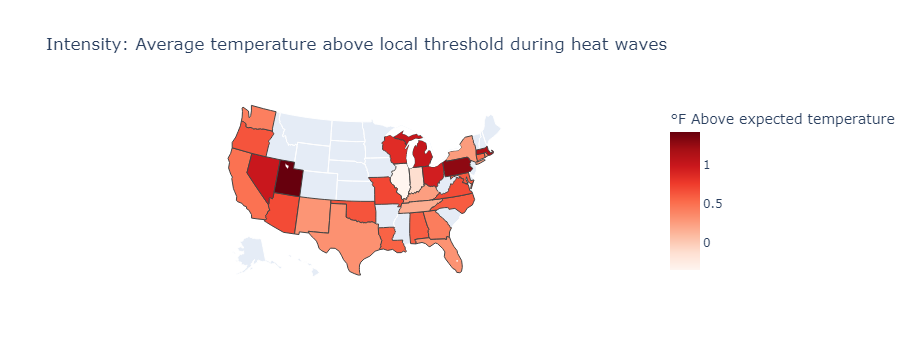

In [24]:
# Intensity in F 
fig = go.Figure(data=go.Choropleth( 
                 locations = changes_group["State"],
                 z = round(changes_group['Intensity Change'].astype(float),2), 
                 locationmode = 'USA-states',
                 colorscale = 'Reds',
                 colorbar_title = "°F Above expected temperature",

               
))

fig.update_layout(
    title_text = 'Intensity: Average temperature above local threshold during heat waves' ,
    geo_scope='usa', # limite map scope to USA
)

fig.show()